## Analisis Variansi
### Distribusi F
#### Membandingkan dua variansi populasi
Distribusi F digunakan untuk menguji apakah kedua variansi populasinya sama. Ciri-ciri distribusi F:
1. Distribusinya kontinu dan berbentuk asimetris positif.
2. Nilainya tidak bisa negatif.
3. Terdapat serumpun distribusi F. Setiap kali derajat kebebasannya, baik pembilang dan penyebut berubah, distribusi baru akan terbentuk.

Asumsi pada distribusi F terhadap populasinya yakni populasi yang diambil sampelnya harus mengikuti distribusi normal. Terdapat pemilihan derajat kebebasan (dof) dalam distribusi F. Dalam menentukan nilai F tabel, kita perlu menggunakan derajat kebebasan untuk pembilang (yang di atas) dan penyebut (yang di bawah), biasanya variansi yang besar diletakkan di pembilang sehingga rasionya paling sedikit adalah 1.00. Formula untuk menghitung nilai F:

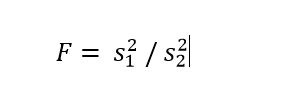<br>
di mana variansi pembilang merupakan variansi yang bernilai lebih besar daripada penyebutnya.

#### Case
Terdapat dua data sampel tentang rute tempuh. Pengamatan dilakukan untuk mencari perbedaan variansi waktu berkendara pada kedua rute tersebut dengan tingkat kepercayaan sebesar 0.1

    Hipotesis nol: var1 = var2<br>
    Hipotesis alternatif: var1 != var2<br>
    Tingkat kepercayaan: 0.1
    Tipe uji: Dua sisi
    Statistik uji: distribusi F

Pengerjaan:


In [152]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats


#preprocess
data1 = [52, 67, 56, 45, 70, 54, 64]
data2 = [59, 60, 61, 51, 56, 63, 57, 65]
alpha = 1 - 0.1 / 2

#kalkulasi
var1 = np.var(data1, ddof = 1)
var2 = np.var(data2, ddof = 1)

if var1 > var2:
    f_hitung = var1 / var2
else:
    f_hitung = var2 / var1

nilai_kritis = stats.f.ppf(alpha, dfn = len(data1) - 1, dfd = len(data2) - 1)
p_value = 2 * (1 - stats.f.cdf(f_hitung, dfn = len(data1) - 1, dfd = len(data2) - 1))

#Kesimpulan
if f_hitung < nilai_kritis:
    print('Nilai f hitung  < nilai kritis, maka gagal tolak Hipotesis Nol')
else:
    print('Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol')

print('Nilai f hitung sebesar', f_hitung)
print('Nilai kritis sebesar', nilai_kritis)
print('Nilai p sebesar', p_value)

Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol
Nilai f hitung sebesar 4.226368159203981
Nilai kritis sebesar 3.865968853123844
Nilai p sebesar 0.08079321312946908


### ANOVA Satu Arah
Dalam ANOVA, perlakuan yang diberikan/terjadi merupakan sumber dari variasi
#### Asumsi
Asumsi yang mendasari ANOVA:
1. Sampel-sampel berasal dari populasi yang mengikuti distribusi normal.
2. Populasinya memiliki standar deviasi yang sama.
3. Sampel-sampelnya saling bebas

#### Rangkuman Formula
Formula yang digunakan antara lain sebagai berikut:
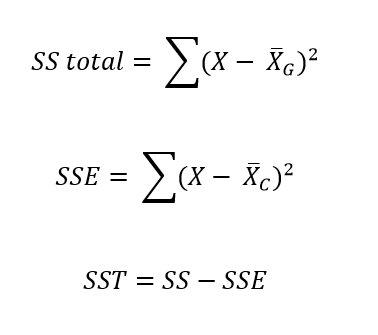
Di mana:

    SS total : Sum Squared/penjumlahan total kuadrat
    XbarG : Rata-rata grup keseluruhan
    SSE : Sum squared error/penjumlahan dari kesalahan kuadrat
    XbarC : Rata-rata tiap kolom/sampel perlakuan

#### Tabel penghitungan nilai F:

| Sumber Variasi | Jumlah Rata-Rata | Derajat Kebebasan | Kuadrat Rata-Rata (MS) | F |
| --- | --- | --- | --- | --- |
| Perlakuan (T) | SST | k - 1 di mana k = jumlah kolom/sampel perlakuan | SST/(k - 1) = MST | MST/MSE = F |
| Kesalahan (E) | SSE | n - k | SSE/(n - k) = MSE |  
| Total | SS total | n - 1 |  

#### Case
Penilaian kepuasan penerbangan dengan mengambil sampel penumpang dari keempat maskapai. Yang dicari adalah apakah ada perbedaan rata-rata tingkat kepuasan antara keempatnya.

    Hipotesis Nol: rata-rata skor dari keempatnya sama sehingga tidak ada perbedaan.
    Hipotesis Alternatif: rata-rata skor sedikitnya dua yang tidak sama sehingga terdapat perbedaan.
    Taraf signifikansi: 99%
    Tipe Uji: One-way, dan hanya ada satu sisi pada ANOVA
    Statistik uji: ANOVA one way

#### Pengerjaan

In [153]:
#informasi
data1 = [94, 90, 85, 80]
data2 = [75, 68, 77, 83, 88]
data3 = [70, 73, 76, 78, 80, 68, 65]
data4 = [68, 70, 72, 65, 74, 65]
alpha = 1 - 0.01

#preprocess
n1 = len(data1)
n2 = len(data2)
n3 = len(data3)
n4 = len(data4)
n = n1 + n2 + n3 + n4
k = 4

#Kalkulasi SS total
merged = []
for i in [data1, data2, data3, data4]:
    merged.extend(i)
    
XbarG = np.mean(merged)
SStotal = np.sum((merged - XbarG) ** 2)

#Kalkulasi Squared Error tiap orang
#SE data1-data4
SE_data1= np.sum((data1 - np.mean(data1)) ** 2)
SE_data2= np.sum((data2 - np.mean(data2)) ** 2)
SE_data3= np.sum((data3 - np.mean(data3)) ** 2)
SE_data4= np.sum((data4 - np.mean(data4)) ** 2)

#Kalkulasi SSE
SSE = np.sum([SE_data1, SE_data2, SE_data3, SE_data4])

#Kalkulasi Sum Squared Tratment(SST)
SST = SStotal - SSE

#Kalkulasi Mean Squared Error dan Treatment
dof_T = k - 1
dof_E = n - k

MST = SST / dof_T
MSE = SSE / dof_E

#Kalkulasi nilai F, Nilai Kritis dan p_value
f_hitung = MST / MSE 
nilai_kritis = stats.f.ppf(alpha, dfn = dof_T, dfd = dof_E)
p_value = 1 - stats.f.cdf(f_hitung, dfn = dof_T, dfd = dof_E)

#Kesimpulan
if f_hitung < nilai_kritis:
    print('Nilai f hitung  < nilai kritis, maka gagal tolak Hipotesis Nol')
else:
    print('Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol')

print('Nilai f hitung sebesar', f_hitung)
print('Nilai kritis sebesar', nilai_kritis)
print('Nilai p sebesar', p_value)

Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol
Nilai f hitung sebesar 8.990643301685516
Nilai kritis sebesar 5.0918895204140115
Nilai p sebesar 0.0007427688984841252


#### Menghitung Perbedaan Variabel-Variabelnya
Jika hipotesis nol dari rata-rata perlakuan yang sama ditolak, kita dapat mengetahui pasangan-pasangan rata-rata yang berbeda melalui interval kepercayaan berikut:

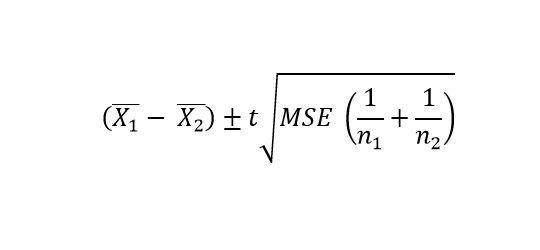

Apabila dalam interval kepercayaan mencangkup nilai 0, maka tidak ada perbedaan antara rata-rata perlakuan. Sebaliknya apabila tidak terdapat nilai 0 di dalam interval kepercayaan, maka terdapat perbedaan.

#### Melanjutkan Pengerjaan
Pada case sebelumnya, kesimpulan yang didapatkan adalah menolak hipotesis nol sehingga terdapat perbedaan antar perlakuannya. Penghitungan perbedaan antar treatment dengan interval kepercayaan sebesar 95% adalah sebagai berikut:

Data 1
Rata-Rata Data 1sebesar 87.25
Upper Confidence Interval Data 1 sebesar 93.28650686336209
Lower Confidence Interval Data 1 sebesar 81.21349313663791 

Data 2
Rata-Rata Data 2sebesar 78.2
Upper Confidence Interval Data 2 sebesar 83.59921587724867
Lower Confidence Interval Data 2 sebesar 72.80078412275134 

Data 3
Rata-Rata Data 3sebesar 72.85714285714286
Upper Confidence Interval Data 3 sebesar 77.42031312799733
Lower Confidence Interval Data 3 sebesar 68.29397258628839 

Data 4
Rata-Rata Data 4sebesar 69.0
Upper Confidence Interval Data 4 sebesar 73.9287872146819
Lower Confidence Interval Data 4 sebesar 64.0712127853181 



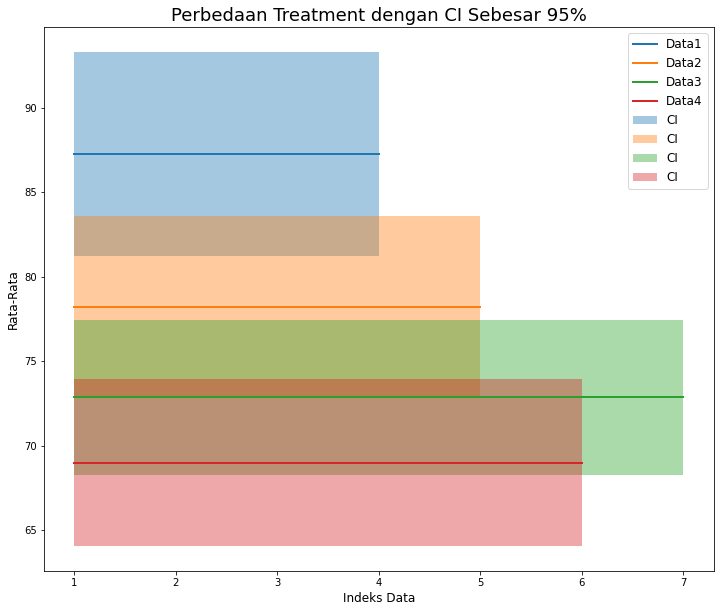

In [154]:
#Kalkulasi Individual Confidence Interval sehingga dapat dibandingkan semuanya
#import for plot
import matplotlib.pyplot as plt
import seaborn as sns

ci = 0.05
data_list = [data1, data2, data3, data4]
plt.figure(figsize = (12, 10))
plt.tight_layout(pad = 6)

for i, val in enumerate(data_list, 1):
    data_upper = np.mean(val) + stats.t.ppf(1 - ci/2, dof_E) * np.sqrt(MSE / len(val))
    data_lower = np.mean(val) - stats.t.ppf(1 - ci/2, dof_E) * np.sqrt(MSE / len(val))
    
    #plot
    sns.lineplot(y = np.mean(val), 
                 x = np.linspace(1, len(val), len(val)), linewidth = 2, 
                 label = 'Data' + str(i))
    plt.fill_between(x = np.linspace(1, len(val), len(val)),
                     y1 = data_upper, y2 = data_lower, 
                     alpha = 0.4, linewidth = 1, label = 'CI')
    plt.legend(fontsize = 12)
    plt.xlabel('Indeks Data', fontsize = 12)
    plt.ylabel('Rata-Rata', fontsize = 12)
    plt.title('Perbedaan Treatment dengan CI Sebesar 95%',
              fontsize = 18)
        
    print('Data ' + str(i))
    print('Rata-Rata Data ' + str(i) + 'sebesar', np.mean(val))
    print('Upper Confidence Interval Data ' + str(i) + ' sebesar', data_upper)
    print('Lower Confidence Interval Data ' + str(i) + ' sebesar', data_lower, '\n')
    
plt.show()

### ANALISIS VARIANSI (ANOVA) DUA ARAH 
Pada ANOVA dua arah, kita mempertimbangkan variabel perlakuan yang kedua, yang disebut variabel penghalang dengan formula sebagai berikut:
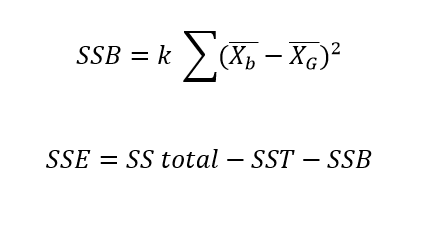

Di mana XbarB adalah rata-rata sampel dari penghalang b. Berikut ini adalah tabel penghitungan ANOVA dua arah:

| Sumber Variasi | Jumlah Rata-Rata | Derajat Kebebasan | Kuadrat Rata-Rata (MS) | F |
| --- | --- | --- | --- | --- |
| Perlakuan (T) | SST | k - 1 di mana k = jumlah kolom/sampel perlakuan | SST/(k - 1) = MST | MST/MSE = F |
| Penghalangan (B) | SSB | b - 1 di mana b adalah jumlah penghalang | SSB/(b - 1) = MSB | MSB / MSE = F |
| Kesalahan (E) | SSE | (k - 1)(b - 1) | SSE/(k - 1)(b - 1) = MSE |  
| Total | SS total | n - 1 | 

#### Case
Pengujian waktu tempuh dengan mengambil sampel berdasarkan empat rute. Pengujiannya diatur oleh lima pengemudi yang berbeda melewati keempat rute tersebut. 
    
    Tanpa menganggap pengemudi (block)
    Hipotesis Nol : Rata-rata waktu tempuh keempat rute sama
    Hipotesis Alternatif : Terdapat perbedaan waktu tempuh di keempat rute
    Taraf signifikansi : 95%
    Statistik uji : ANOVA One Way

#### Pengerjaan
    


In [155]:
#Informasi
US6 = [18, 16, 21, 23, 25]
West_End = [17, 23, 21, 22, 24]
Hickory = [21, 23, 26, 29, 28]
Rte = [22, 22, 22, 25, 28]
alpha = 0.05

#preprocess
n1 = len(US6)
n2 = len(West_End)
n3 = len(Hickory)
n4 = len(Rte)
k = 4

#kalkulasi SS total
merged = list()

for i in [US6, West_End, Hickory, Rte]:
    merged.extend(i)

SStotal = np.sum((merged - np.mean(merged)) ** 2)

#kalkulasi SSE
SSE = 0

for i in [US6, West_End, Hickory, Rte]:
    SSE += np.sum((i - np.mean(i)) ** 2)

#kalkulasi SST
SST = SStotal - SSE

#kalkulasi MSE, MST, F_hitung, p_value
doft = (k - 1)
dofe = len(merged) - k

MST = SST / doft
MSE = SSE / dofe
F_hitung = MST / MSE
nilai_kritis = stats.f.ppf(1 - 0.05, doft, dofe)
p_value = 1 - stats.f.cdf(F_hitung, doft, dofe)

#Kesimpulan
if F_hitung < nilai_kritis:
    print('Nilai f hitung  < nilai kritis, maka gagal tolak Hipotesis Nol')
else:
    print('Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol')

print('Nilai f hitung sebesar', F_hitung)
print('Nilai kritis sebesar', nilai_kritis)
print('Nilai p sebesar', p_value)


Nilai f hitung  < nilai kritis, maka gagal tolak Hipotesis Nol
Nilai f hitung sebesar 2.482523444160274
Nilai kritis sebesar 3.238871517453585
Nilai p sebesar 0.09810502183757919


#### Variabel Penghalang
Pengerjaan selanjutnya adalah dua arah dengan melanjutkan case sebelumnya

In [156]:
#informasi - 
driver = list()

for i in range(0, 5):
    driver.append([])
    for j in [US6, West_End, Hickory, Rte]:
        driver[i].append(j[i])

#kalkulasi SSB
SSB = 0

for i in range(0, 5):
    SSB += k * (np.mean(driver[i]) - np.mean(merged)) ** 2

#kalkulasi SSE dua arah - bisa pakai SSE oneway - SSB atau SStotal - SST - SSB
SSE_two_way = SSE - SSB

#MSE two way
MSE_two_way = SSE_two_way / ((k - 1) * (len(driver) - 1))

#kalkulasi MSB, F_hitung, p_value, nilai kritis
MSB = SSB / (len(driver) - 1)
F_hitung_MSB = MSB / MSE_two_way
nilai_kritis_MSB = stats.f.ppf(1 - alpha, len(driver) - 1, (k-1) * (len(driver) - 1))
p_value_MSB = 1 - stats.f.cdf(F_hitung_MSB, len(driver) - 1, (k-1) * (len(driver) - 1))

F_hitung_MST = MST / MSE_two_way
nilai_kritis_MST = stats.f.ppf(1 - alpha, k - 1, (k-1) * (len(driver) - 1))
p_value_MST = 1 - stats.f.cdf(F_hitung_MST, k - 1, (k-1) * (len(driver) - 1))

#Kesimpulan
if F_hitung_MST < nilai_kritis_MST:
    print('Nilai f hitung MST  < nilai kritis MST, maka gagal tolak Hipotesis Nol pada Faktor 1 (Treatment)')
else:
    print('Nilai f hitung MST > nilai kritis MST, maka menolak Hipotesis Nol pada perlakuan 1 (Treatment)')

print('Nilai f hitung sebesar', F_hitung_MST)
print('Nilai kritis sebesar', nilai_kritis_MST)
print('Nilai p sebesar', p_value_MST, '\n\n')

#Kesimpulan
if F_hitung_MSB < nilai_kritis_MSB:
    print('Nilai f hitung MSB  < nilai kritis, maka gagal tolak Hipotesis Nol pada Faktor 2 (Block)')
else:
    print('Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol pada Faktor 2 (Block)')

print('Nilai f hitung sebesar', F_hitung_MSB)
print('Nilai kritis sebesar', nilai_kritis_MSB)
print('Nilai p sebesar', p_value_MSB)

Nilai f hitung MST > nilai kritis MST, maka menolak Hipotesis Nol pada perlakuan 1 (Treatment)
Nilai f hitung sebesar 7.9346049046321525
Nilai kritis sebesar 3.490294819497605
Nilai p sebesar 0.0035079131535467045 


Nilai f hitung > nilai kritis , maka menolak Hipotesis Nol pada Faktor 2 (Block)
Nilai f hitung sebesar 9.784741144414163
Nilai kritis sebesar 3.259166726901249
Nilai p sebesar 0.0009335737191148441


### ANOVA Dua Arah dengan Interaksi
Pada ANOVA dua arah dengan interaksi, kita mempertimbangkan kedua variabel perlakuan dan interaksi yang mungkin antara variabelnya. Interaksi di sini adalah pengaruh dari suatu faktor terhadap variabel respons yang berbeda bergantung pada nilai dari faktor lain. Hipotesis nol yang biasa digunakan adalah tidak terdapat interaksi. Sedangkan hipotesis alternatifnya terdapat interaksi.

Formula interaksinya adalah sebagai berikut:
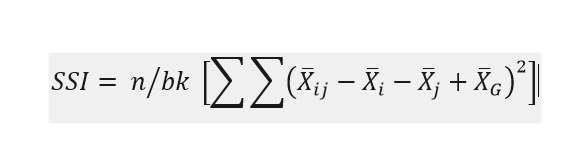

Di mana:<br>
Xbar_ij adalah rata-rata waktu perjalanan pada rute i sebagai Faktor 1, dan rata-rata Faktor j.

Tabel pengerjaannya adalah sebagai berikut:

| Sumber Variasi | Jumlah Rata-Rata | Derajat Kebebasan | Kuadrat Rata-Rata (MS) | F |
| --- | --- | --- | --- | --- |
| Perlakuan (T) | SST | k - 1 di mana k = jumlah kolom/sampel perlakuan | SST/(k - 1) = MST | MST/MSE = F |
| Penghalangan (B) | SSB | b - 1 di mana b adalah jumlah penghalang | SSB/(b - 1) = MSB | MSB / MSE = F |
| Hubungan/Interaksi (I) | SSI | (k - 1)(b - 1) | SSI/((k - 1)(b - 1)) = MSI | MSI / MSE = F |
| Kesalahan (E) | SSE | n - kb | SSE/(n - kb) = MSE |  
| Total | SS total | n - 1 | 

### Case
Berikut adalah data yang digunakan:
<b> JANGAN LUPA SS ITU ARTINYA SUM SQUARED --> SUM(X - Xbar)^2

In [235]:
#Informasi
driver = ['Deans', 'Deans', 'Deans', 'Snaverly', 
          'Snaverly', 'Snaverly', 'Ormson', 'Ormson', 
          'Ormson', 'Zollaco', 'Zollaco', 'Zollaco', 
          'Filbeck', 'Filbeck', 'Filbeck']
US6 = [18, 15, 21, 19, 15, 14, 19, 21, 
       23, 24, 20, 25, 27, 25, 23]
West_End = [14, 17, 20, 20, 24, 25, 23, 
            21, 19, 20, 24, 22, 24, 24, 24]
Hickory = [20, 21, 22, 24, 23, 22, 25, 29, 
           24, 30, 28, 29, 28, 28, 28]
Route = [19, 22, 25, 24, 22, 20, 23, 23, 
         20, 26, 25, 24, 28, 30, 26]

alpha = 1 - 0.05

df = pd.DataFrame({'driver' : driver,
                   'US6' : US6,
                   'West_End' : West_End,
                   'Hickory' : Hickory,
                   'Route' : Route})

print(df.head())

     driver  US6  West_End  Hickory  Route
0     Deans   18        14       20     19
1     Deans   15        17       21     22
2     Deans   21        20       22     25
3  Snaverly   19        20       24     24
4  Snaverly   15        24       23     22


### Pengerjaan
Dalam penghitungan ANOVA Two Way terdapat beberapa step yang dilakukan, di antaranya adalah

In [241]:
#Kalkulasi SStotal
merged = df.iloc[:, 1:].to_numpy().flatten()
SStotal = np.sum((merged - np.mean(merged)) ** 2)

#Kalkulasi SSB/SS Faktor B (Column) - Route
SSB = 0
for i in [US6, West_End, Hickory, Route]:
    SSB += len(i) * (np.mean(i) - np.mean(merged)) ** 2

#ALternatif hitung SSB
SSB_ = list()
for i in [US6, West_End, Hickory, Route]:
    SSB_.append(np.sum(i))

SSB_alt = np.sum((SSB_ - np.mean(SSB_)) ** 2) / len(US6)
    
#Kalkulasi SST/SS Faktor A (Row) - Driver
sum_preSSA = []
for i in df.driver.unique():
    values = np.sum(np.sum(df[df.driver == i].iloc[:, 1:]))
    sum_preSSA.append(values)

SST = np.sum((sum_preSSA - np.mean(sum_preSSA)) ** 2) / (df.columns[1:].nunique() * np.mean(df.driver.value_counts()))

#Kalkulasi SSE/ Sum Squared Error(Within)
SSE_two_way_I = 0
for i in df.driver.unique():
    for j in df.columns[1:]:
        valued = df[df.driver == i][j]
        SSE_two_way_I += np.sum((valued - np.mean(valued)) ** 2)

#Kalkulasi SSI-Interaksi(Faktor A : Faktor B)
SSI = SStotal - SSB_alt - SST - SSE_two_way_I


#Menentukan degree of freedom
doft = df.driver.nunique() - 1  #dof untuk treatment atau Faktor A
dofb = df.columns[1:].nunique() - 1  #dof untuk block atau Faktor B
dofi = doft * dofb  #dof interaksi
dofe = np.sum(df.iloc[:, 1:].count()) - (doft + 1) * (dofb + 1)  #dof SSE/kesalahan
dof_total = np.sum(df.iloc[:, 1:].count())

#Memghitung Mean Squared Faktor A, Faktor B, Interaksi, dan Error
MSA = SST / doft
MSB = SSB_alt / dofb
MSI = SSI / dofi
MSE = SSE_two_way_I / dofe

#Menghitung F Faktor A, F Faktor B, dan F Interaksi
f_faktor_A = MSA / MSE
f_faktor_B = MSB / MSE
f_interaksi = MSI / MSE

#Menghitung p-value dan nilai kritisnya
nilai_kritis_f_A = stats.f.ppf(alpha, doft, dofe)
nilai_kritis_f_B = stats.f.ppf(alpha, dofb, dofe)
nilai_kritis_i = stats.f.ppf(alpha, dofi, dofe)

p_value_A = 1 - stats.f.cdf(f_faktor_A, doft, dofe)
p_value_B = 1 - stats.f.cdf(f_faktor_B, dofb, dofe)
p_value_i = 1 - stats.f.cdf(f_interaksi, dofi, dofe)

#Kesimpulan
print('Kesimpulan', '\n')
if f_faktor_A < nilai_kritis_f_A:
    print('Nilai f hitung faktor A  < nilai kritis faktor A, maka gagal tolak Hipotesis Nol pada Faktor A, yakni rata-rata waktu rute sama')
else:
    print('Nilai f hitung faktor A  > nilai kritis faktor A, maka menolak Hipotesis Nol pada Faktor A, yakni rata-rata rute waktu terdapat perbedaan')

if f_faktor_B < nilai_kritis_f_B:
    print('Nilai f hitung faktor B  < nilai kritis faktor B, maka gagal tolak Hipotesis Nol pada Faktor B, yakni rata-rata waktu pengemudi sama')
else:
    print('Nilai f hitung faktor B  > nilai kritis faktor B, maka menolak Hipotesis Nol pada Faktor B, yakni rata-rata waktu rute terdapat perbedaan')
    
if f_interaksi < nilai_kritis_i:
    print('Nilai f hitung interaksi < nilai kritis interaksi, maka gagal tolak Hipotesis Nol pada interaksi, yakni tidak ada interaksi antara rute dan pengemudi')
else:
    print('Nilai f hitung interaksi  > nilai kritis interaksi, maka menolak Hipotesis Nol pada interaksi, yakni terdapat interaksi antara rute dan pengemudi')

print('----------------------------------------------------------------------')
print('Nilai f hitung Faktor A sebesar', f_faktor_A)
print('Nilai f hitung Faktor B sebesar', f_faktor_B)
print('Nilai f hitung interaksi', f_interaksi, '\n')
print('Nilai kritis Faktor A sebesar', nilai_kritis_f_A)
print('Nilai kritis Faktor B sebesar', nilai_kritis_f_B)
print('Nilai kritis interaksi', nilai_kritis_i, '\n')
print('Nilai p Faktor A sebesar', p_value_A)
print('Nilai p Faktor B sebesar', p_value_B)
print('Nilai p interaksi sebesar', p_value_i)

Kesimpulan 

Nilai f hitung faktor A  > nilai kritis faktor A, maka menolak Hipotesis Nol pada Faktor A, yakni rata-rata rute waktu terdapat perbedaan
Nilai f hitung faktor B  > nilai kritis faktor B, maka menolak Hipotesis Nol pada Faktor B, yakni rata-rata waktu rute terdapat perbedaan
Nilai f hitung interaksi  > nilai kritis interaksi, maka menolak Hipotesis Nol pada interaksi, yakni terdapat interaksi antara rute dan pengemudi
----------------------------------------------------------------------
Nilai f hitung Faktor A sebesar 20.877906976744192
Nilai f hitung Faktor B sebesar 16.930232558139537
Nilai f hitung interaksi 2.1337209302325575 

Nilai kritis Faktor A sebesar 2.605974949123867
Nilai kritis Faktor B sebesar 2.8387453980206443
Nilai kritis interaksi 2.003459395501832 

Nilai p Faktor A sebesar 2.3393519343883895e-09
Nilai p Faktor B sebesar 2.972732485728713e-07
Nilai p interaksi sebesar 0.03643095678442054


#### Penghitungan Menggunakan Statsmodels

In [244]:
df_ = df
codes, unique = pd.factorize(df_.driver)
df_.driver = codes

melted = df_.melt(id_vars=['driver'])

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'value ~ C(driver) + C(variable) + C(driver):C(variable)'
model = ols(formula, melted).fit()

anova_table = anova_lm(model, typ = 2)
print(anova_table)



                       sum_sq    df          F        PR(>F)
C(driver)               359.1   4.0  20.877907  2.339352e-09
C(variable)             218.4   3.0  16.930233  2.972732e-07
C(driver):C(variable)   110.1  12.0   2.133721  3.643096e-02
Residual                172.0  40.0        NaN           NaN
